In [1]:
cd /home/cms-jovyan/b_lepton_met

/home/cms-jovyan/b_lepton_met


In [10]:
import json
from coffea import processor
from bkg_est_processor import BackgroundEstimatorProcessor

In [11]:
year = "2017"
n_files = 1

with open(f"/home/cms-jovyan/VBFDM_UdeA/fileset/fileset_{year}_UL_NANO.json", "r") as f:
    fileset = json.load(f)
    
for key, val in fileset.items():
    if val is not None:
        fileset[key] = ["root://xcache/" + file for file in val[:n_files]]

In [12]:
#client = Client("tls://daniel-2eocampo-2ehenao-40cern-2ech.dask.cmsaf-prod.flatiron.hollandhpc.org:8786")

out = processor.run_uproot_job(
    fileset,
    treename="Events",
    processor_instance=BackgroundEstimatorProcessor(),
    executor=processor.IterativeExecutor,
    executor_args={
        "schema": processor.NanoAODSchema,
    },
)

Output()

/opt/conda/lib/python3.8/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: 
RuntimeWarning: Missing cross-reference index for FatJet_genJetAK8Idx => GenJetAK8
  warnings.warn(

In [31]:
fname = "outfiles/2022-10-05/ele/WW/958c78da-5124-11eb-97f9-01051cacbeef_%2FEvents%3B1_475000-570000.parquet"

df = pd.read_parquet(fname)
print(df.shape)
df.head()

(19, 10)


,met,jet_pt,jet_eta,jet_phi,weight,lep_pt,lep_isolation,lep_misolation,lep_met_mt,lep_bjet_dr
0,46.904724,52.09375,3.671387,-3.091309,1.169550,35.608887,0.000618,0.016072,72.332123,3.925049
1,50.259678,52.09375,3.671387,-3.091309,0.971864,82.282761,0.025100,0.018748,26.940666,4.291263
2,45.596161,52.09375,3.671387,-3.091309,1.233495,48.847687,0.012087,0.000000,79.598488,4.548749
3,35.647923,52.09375,3.671387,-3.091309,0.869714,138.340561,0.032664,0.012519,132.992859,5.087077
4,24.135639,52.09375,3.671387,-3.091309,0.911352,50.206402,0.000000,0.005339,52.438007,2.118290


In [41]:
{
    'ZJetsToNuNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8': 'ZJetsToNuNu_HT-800To1200',
    'ZJetsToNuNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8': 'ZJetsToNuNu_HT-600To800',
    'ZJetsToNuNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8': 'ZJetsToNuNu_HT-400To600',
    'ZJetsToNuNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8': 'ZJetsToNuNu_HT-2500ToInf',
    'ZJetsToNuNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8': 'ZJetsToNuNu_HT-200To400',
    'ZJetsToNuNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8': 'ZJetsToNuNu_HT-1200To2500',
    'ZJetsToNuNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8': 'ZJetsToNuNu_HT-100To200',
    'WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8': 'WJetsToLNu_HT-800To1200',
    'WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8': 'WJetsToLNu_HT-600To800',
    'WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8': 'WJetsToLNu_HT-400To600',
    'WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8': 'WJetsToLNu_HT-200To400',
    'WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8': 'WJetsToLNu_HT-1200To2500',
    'WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8': 'WJetsToLNu_HT-100To200',
    'WZ_TuneCP5_13TeV-pythia8': 'WZ',
    'WW_TuneCP5_13TeV-pythia8': 'WW',
    'ZZ_TuneCP5_13TeV-pythia8': 'ZZ',
    'TTbar_13TeV_TuneCP5_Pythia8': 'TTbar',
    'ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8': 'ST_tW_top_5f_inclusiveDecays',
    'ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8': 'ST_tW_antitop_5f_inclusiveDecays',
    'ST_t-channel_top_4f_InclusiveDecays_TuneCP5CR1_13TeV-powheg-madspin-pythia8': 'ST_t-channel_top_4f_InclusiveDecays',
    'ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5CR1_13TeV-powheg-madspin-pythia8': 'ST_t-channel_antitop_4f_InclusiveDecays',
    'ST_s-channel_4f_InclusiveDecays_13TeV-amcatnlo-pythia8': 'ST_s-channel_4f_InclusiveDecays'
}

In [36]:
out["WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8"]["bjet_kin"][{"region":"ele_control"}].project(f"bjet_pt")

Hist(Regular(50, 30, 1000, name='bjet_pt', label='b-jet $p_T$ [GeV]'), storage=Weight()) # Sum: WeightedSum(value=369.778, variance=379.568) (WeightedSum(value=441.715, variance=457.498) with flow)

In [10]:
pwd

'/home/cms-jovyan/b_lepton_met/analysis'

In [13]:
df = pd.read_parquet("outfiles/ele/parquet/condor_e84f9e1c-7366-11eb-8922-1ebde183beef_%2FEvents%3B1_0-100607.parquet")
print(df.shape)
df.head()

(296, 6)


,met,weight,lep_pt,lep_isolation,lep_misolation,lep_met_mt
0,77.951599,0.730082,76.150627,0.019050,0.033655,30.661224
1,101.896530,0.912213,288.088684,0.010069,0.000000,57.943893
2,84.854073,0.657450,65.421143,0.001875,0.000000,39.451263
3,52.126545,1.405892,173.948975,0.000000,0.000000,61.812927
4,96.163193,0.800947,70.934044,0.005759,0.000000,74.748001


ZZ_TuneCP5_13TeV-pythia8
ZJetsToNuNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8
ZJetsToNuNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8
ZJetsToNuNu_HT-2500ToInf_TuneCP5_13TeV-madgraphMLM-pythia8
ZJetsToNuNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8
ZJetsToNuNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8
WZ_TuneCP5_13TeV-pythia8
WW_TuneCP5_13TeV-pythia8
WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8
WJetsToLNu_HT-600To800_TuneCP5_13TeV-madgraphMLM-pythia8
WJetsToLNu_HT-400To600_TuneCP5_13TeV-madgraphMLM-pythia8
WJetsToLNu_HT-200To400_TuneCP5_13TeV-madgraphMLM-pythia8
WJetsToLNu_HT-1200To2500_TuneCP5_13TeV-madgraphMLM-pythia8
WJetsToLNu_HT-100To200_TuneCP5_13TeV-madgraphMLM-pythia8
ST_tW_top_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8
ST_tW_antitop_5f_inclusiveDecays_TuneCP5_13TeV-powheg-pythia8
ST_t-channel_top_4f_InclusiveDecays_TuneCP5CR1_13TeV-powheg-madspin-pythia8
ST_t-channel_antitop_4f_InclusiveDecays_TuneCP5CR1_13TeV-powheg-madspin-pythia8
ZZ_TuneCP5_

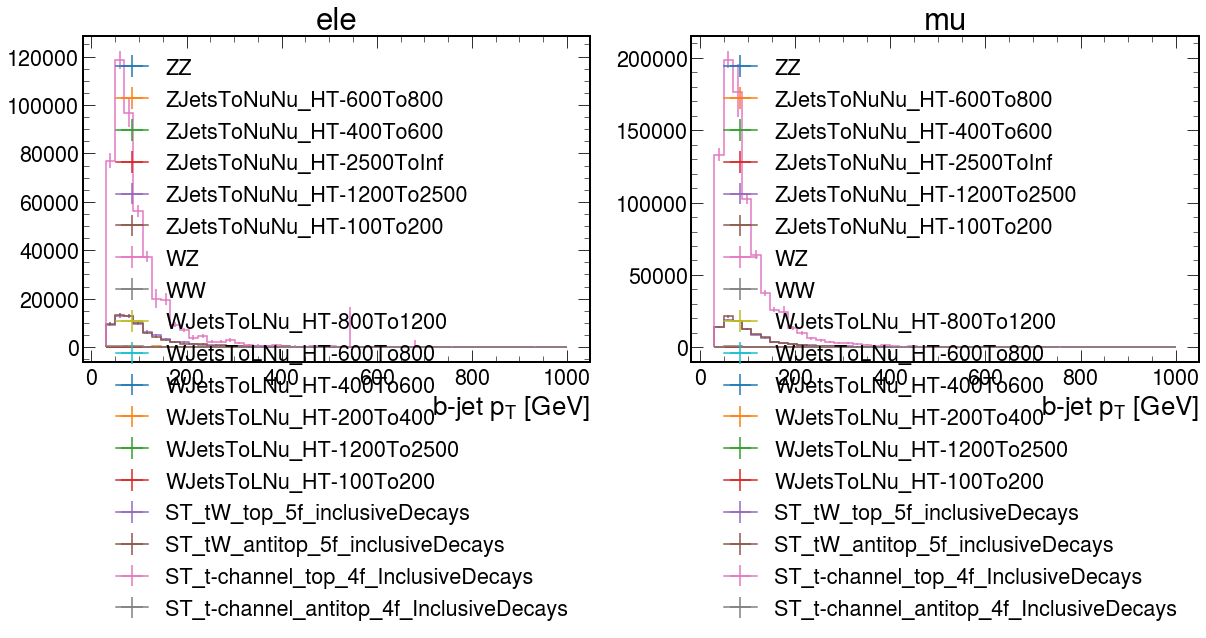

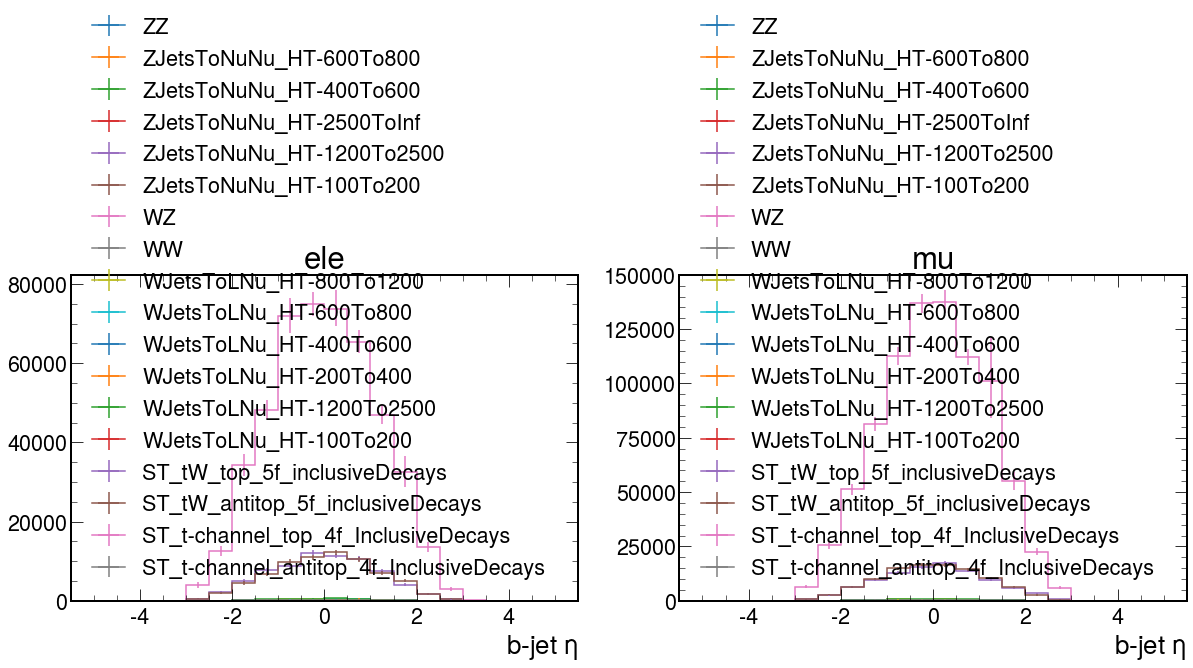

In [43]:
import mplhep as hep
import matplotlib.pyplot as plt
hep.style.use(hep.style.CMS)

for kin in ["pt", "eta"]:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    for dataset in out:
        try:
            hep.histplot(out[dataset]["bjet_kin"][{"region":"ele_control"}].project(f"bjet_{kin}"), label=dataset_reduce_name[dataset], ax=ax[0])
            hep.histplot(out[dataset]["bjet_kin"][{"region":"mu_control"}].project(f"bjet_{kin}"), label=dataset_reduce_name[dataset], ax=ax[1])
            print(dataset)
        except KeyError:
            pass
    ax[0].set(title="ele")
    ax[0].legend()
    ax[1].set(title="mu")
    ax[1].legend()

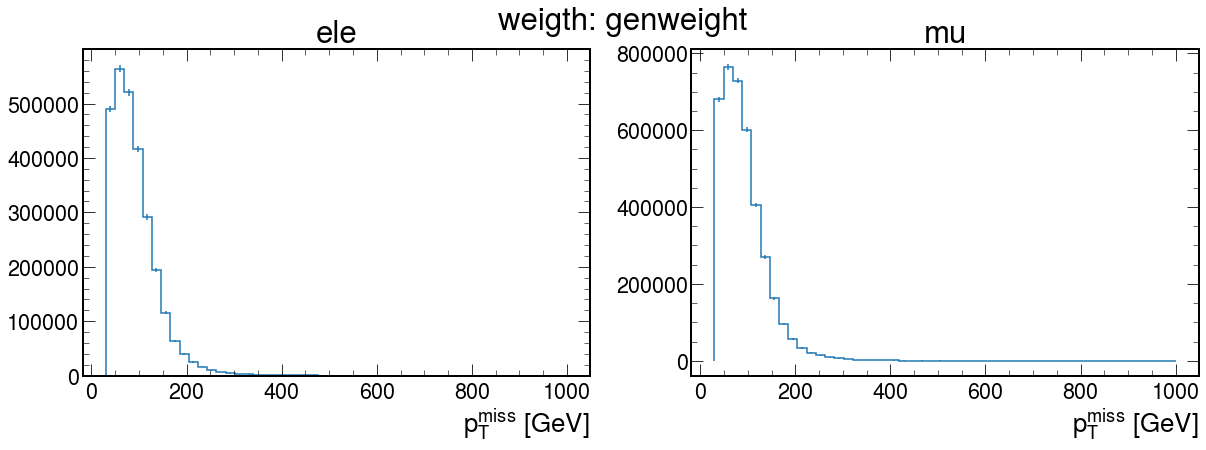

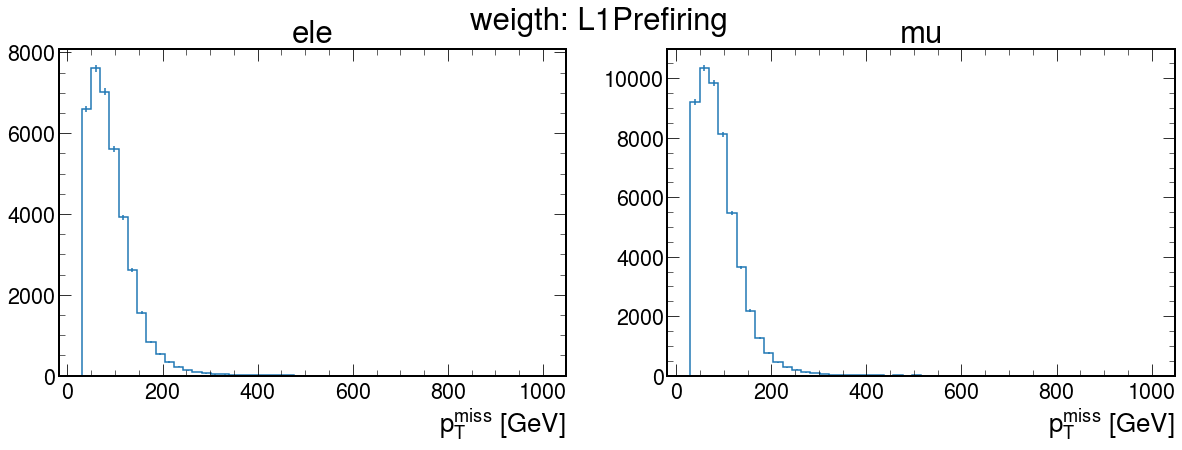

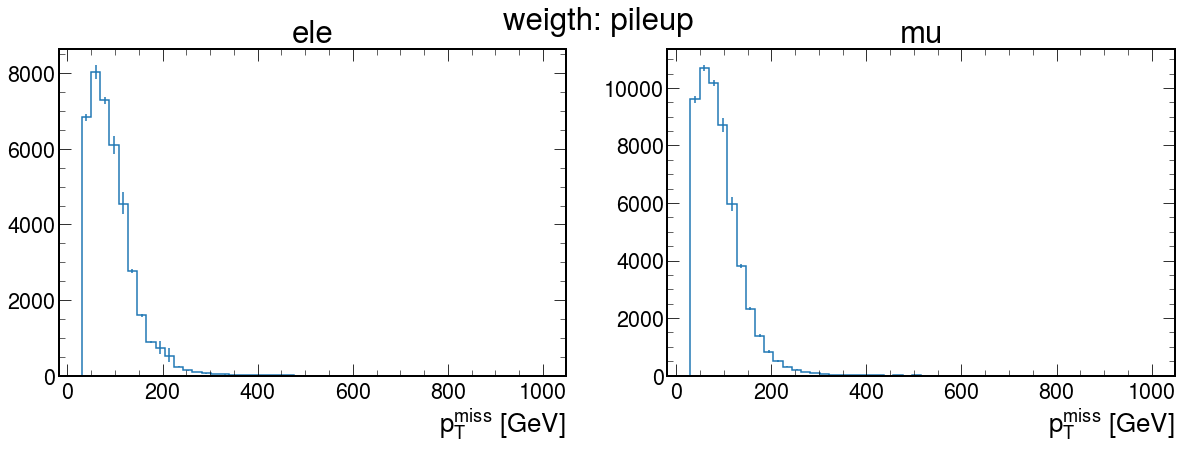

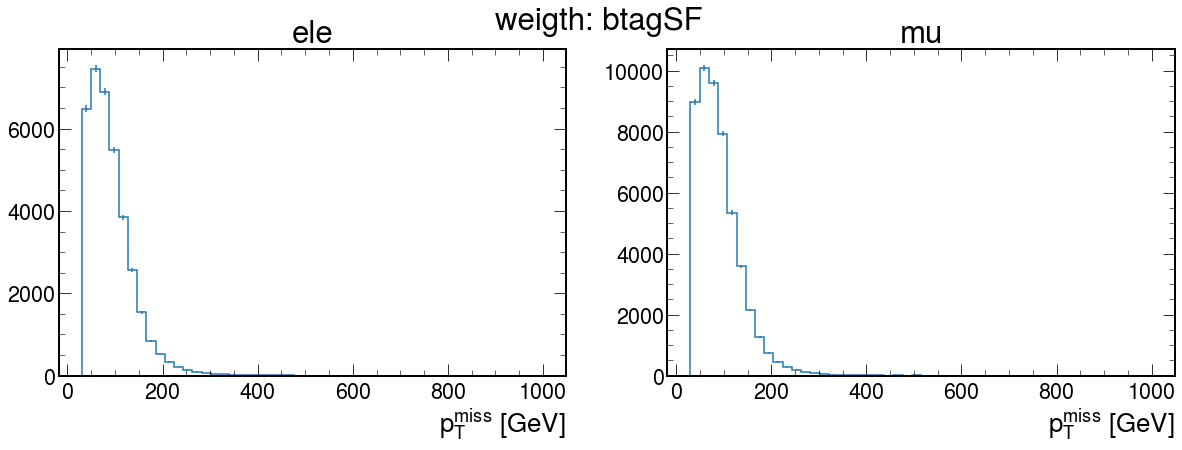

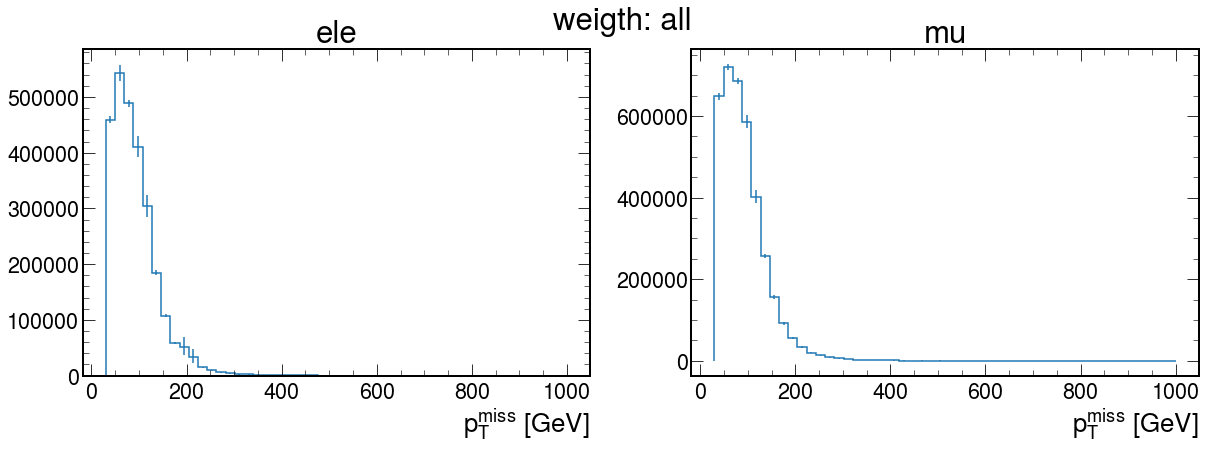

In [7]:
for weigth in ["genweight", "L1Prefiring", "pileup", "btagSF", "all"]:
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    fig.suptitle(f"weigth: {weigth}")
    ax[0].set(title="ele")
    ax[1].set(title="mu")
    hep.histplot(out['TTTo2L2Nu']["met_kin"][{"region":"ele_control", "weigth":weigth}].project(f"met_pt"), ax=ax[0])
    hep.histplot(out['TTTo2L2Nu']["met_kin"][{"region":"mu_control", "weigth":weigth}].project(f"met_pt"), ax=ax[1])